In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import seaborn as sns
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import zipfile
from sklearn.utils import shuffle

zf = zipfile.ZipFile('drive/My Drive/SOURCE DATA SCIENCE/archive.zip') # having archive.csv zipped file.
df_train = pd.read_csv(zf.open('train.csv'), index_col = "Activity") 
df_test = pd.read_csv(zf.open('test.csv'), index_col = "Activity")

df_train = shuffle(df_train)
df_test = shuffle(df_test)

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WALKING,0.393036,-0.035508,-0.096930,-0.215820,0.023866,-0.251494,-0.249454,0.023258,-0.278413,-0.007768,-0.136535,-0.194124,0.210761,0.067789,0.345664,-0.098911,-0.688607,-0.796697,-0.745981,-0.319481,-0.160565,-0.357230,0.550041,0.338175,0.121285,-0.353071,0.212718,0.031531,0.050186,-0.431854,0.520354,-0.294795,0.090070,-0.408343,0.417422,-0.158423,-0.189919,0.030999,-0.016523,0.111382,...,-0.454387,0.326371,-0.904762,-0.065498,0.147117,-0.220220,-0.464997,-0.511719,-0.474567,-0.626406,-0.967318,-0.464997,-0.839093,-0.509740,0.542478,-0.589744,0.212420,-0.404980,-0.751005,-0.550479,-0.541014,-0.496765,-0.564387,-0.713698,-0.550479,-0.889402,-0.493091,0.384439,-0.904762,-0.004302,-0.143888,-0.515889,-0.811886,0.419394,-0.418898,-0.313944,-0.696604,0.286523,0.111463,17
STANDING,0.279812,-0.009229,-0.108859,-0.997079,-0.965516,-0.986990,-0.997420,-0.965268,-0.987193,-0.941530,-0.539611,-0.817126,0.850073,0.692724,0.838841,-0.987648,-0.999983,-0.999529,-0.999744,-0.997615,-0.970612,-0.987642,-0.633239,-0.264292,-0.566508,0.207631,-0.031244,0.100655,0.070045,0.251341,-0.228236,0.336316,-0.301663,0.343729,-0.049137,0.033284,0.046999,0.169059,-0.176466,0.052964,...,-0.988779,-1.000000,-0.746032,0.131102,-0.542409,-0.859902,-0.990110,-0.986167,-0.986907,-0.984611,-0.997127,-0.990110,-0.999862,-0.989437,-0.787033,-1.000000,-0.183476,-0.043566,-0.356218,-0.995061,-0.995303,-0.994247,-0.996168,-0.994639,-0.995061,-0.999974,-0.992389,-1.000000,-1.000000,0.126509,-0.586242,-0.856196,0.002088,0.064013,-0.132991,0.619262,-0.897183,0.168929,0.010264,15
WALKING_UPSTAIRS,0.181504,-0.094074,-0.178262,-0.064572,-0.109424,-0.334114,-0.192659,-0.161285,-0.324384,0.171278,-0.080983,-0.464330,-0.027124,0.192982,0.445468,-0.120994,-0.559647,-0.835535,-0.790828,-0.408826,-0.450907,-0.283662,0.555870,0.004598,-0.126710,-0.258173,0.128774,-0.100619,0.293648,-0.231463,0.152564,-0.080707,0.368134,-0.178401,0.128177,-0.152636,0.146911,-0.530165,-0.139394,0.079164,...,-

In [ ]:
print('size of data train',df_train.shape)
print('size of data test',df_test.shape)

size of data train (7352, 562)
size of data test (2947, 562)


In [ ]:
pd.crosstab(index = df_train.index, columns="count")

col_0,count
row_0,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


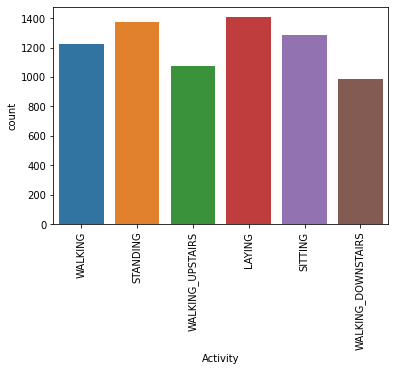

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.countplot(x=df_train.index, data=df_train)
plt.xticks(x = df_train.index,  rotation='vertical')
plt.show()

In [ ]:
df_train.index.unique()

Index(['WALKING', 'STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS'],
      dtype='object', name='Activity')

In [ ]:
StaticTrain = df_train.loc[['STANDING','SITTING','LAYING']]
StaticTest = df_test.loc[['STANDING','SITTING','LAYING']]

In [ ]:
StaticTrain.index.unique()

Index(['STANDING', 'SITTING', 'LAYING'], dtype='object', name='Activity')

In [ ]:
StaticTest.index.unique()

Index(['STANDING', 'SITTING', 'LAYING'], dtype='object', name='Activity')

In [ ]:
subject_training_data = StaticTrain['subject']
subject_testing_data = StaticTest['subject']
StaticTrain = StaticTrain.drop(['subject'], axis=1)
StaticTest = StaticTest.drop(['subject'], axis=1)

In [ ]:
StaticTrain.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
STANDING,0.279812,-0.009229,-0.108859,-0.997079,-0.965516,-0.986990,-0.997420,-0.965268,-0.987193,-0.941530,-0.539611,-0.817126,0.850073,0.692724,0.838841,-0.987648,-0.999983,-0.999529,-0.999744,-0.997615,-0.970612,-0.987642,-0.633239,-0.264292,-0.566508,0.207631,-0.031244,0.100655,0.070045,0.251341,-0.228236,0.336316,-0.301663,0.343729,-0.049137,0.033284,0.046999,0.169059,-0.176466,0.052964,...,-0.999756,-0.988779,-1.000000,-0.746032,0.131102,-0.542409,-0.859902,-0.990110,-0.986167,-0.986907,-0.984611,-0.997127,-0.990110,-0.999862,-0.989437,-0.787033,-1.000000,-0.183476,-0.043566,-0.356218,-0.995061,-0.995303,-0.994247,-0.996168,-0.994639,-0.995061,-0.999974,-0.992389,-1.000000,-1.000000,0.126509,-0.586242,-0.856196,0.002088,0.064013,-0.132991,0.619262,-0.897183,0.168929,0.010264
STANDING,0.274355,-0.007671,-0.091210,-0.997025,-0.959407,-0.980479,-0.997336,-0.958406,-0.979852,-0.942288,-0.550698,-0.794378,0.846971,0.680981,0.847907,-0.978340,-0.999981,-0.999370,-0.999127,-0.996922,-0.965393,-0.978856,-0.777403,-0.202338,-0.203109,0.317901,-0.197911,0.144051,0.147647,0.119012,-0.181318,0.326227,-0.274933,0.323862,-0.195119,0.042358,-0.118700,-0.306203,-0.415106,0.420246,...,-0.999852,-0.988727,-1.000000,-0.968254,0.213542,-0.487898,-0.812442,-0.988428,-0.979051,-0.982773,-0.973671,-0.996712,-0.988428,-0.999745,-0.989797,-0.707158,-1.000000,-0.385725,0.438079,0.262306,-0.995866,-0.995003,-0.994314,-0.995021,-0.993850,-0.995866,-0.999977,-0.993857,-0.955696,-1.000000,0.209376,-0.326697,-0.647329,0.015935,0.852904,-0.162749,0.613947,-0.927014,0.071032,-0.029895
STANDING,0.282672,-0.058369,-0.166825,-0.980440,-0.848483,-0.898052,-0.986289,-0.829429,-0.882769,-0.900349,-0.556719,-0.816139,0.837684,0.612476,0.776590,-0.899688,-0.999721,-0.992002,-0.988965,-0.993175,-0.831883,-0.853685,-0.383307,-0.494256,-0.559039,0.304026,-0.177280,0.260106,-0.093155,-0.106270,-0.021687,0.035313,0.181930,0.478265,-0.329913,0.300349,-0.571331

In [ ]:
training_labels = StaticTrain.index
testing_labels = StaticTest.index

In [ ]:
StaticTrain.reset_index(drop=True, inplace=True)
StaticTest.reset_index(drop=True, inplace=True)

In [ ]:
StaticTrain.index.unique()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066],
           dtype='int64', length=4067)

In [ ]:
StaticTest.index.unique()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559],
           dtype='int64', length=1560)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(StaticTrain.shape[0], StaticTrain.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(df_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 4067 instances of data with 561 total features
Training data includes value counts of
 LAYING      1407
STANDING    1374
SITTING     1286
Name: Activity, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
 LAYING      537
STANDING    532
SITTING     491
Name: Activity, dtype: int64


In [47]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(StaticTrain.select_dtypes(include=numerics).columns)
X_train = StaticTrain#[numerical_vars]
X_train.shape
#X_train.head()

561

In [ ]:
numerical_vars = list(StaticTest.select_dtypes(include=numerics).columns)
X_test = StaticTest#[numerical_vars]
X_test.shape

(1560, 561)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(["SITTING", "STANDING", "LAYING"])
y_train = le.transform(training_labels)  
y_test = le.transform(testing_labels)

In [ ]:
le.classes_[2]

'STANDING'

In [ ]:
#normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
print ("X_train shape: ",X_train.shape)
print ("X_test shape: ",X_test.shape)

X_train shape:  (4067, 561)
X_test shape:  (1560, 561)


In [ ]:
print ("y_train shape: ",y_train.shape)
print ("y_test shape: ",y_test.shape)

y_train shape:  (4067,)
y_test shape:  (1560,)


In [53]:
import numpy as np

x_train_reshaped=np.reshape(X_train,(-1, 3, 561, 64))
#x_test_reshaped=np.reshape(x_test,(10000, 28, 28))

ValueError: ignored

In [ ]:
verbose = 1
epochs = 70
batch_size = 40

n_timesteps = X_train.shape[0]
n_features = X_train.shape[1]

In [ ]:
checkpoint = ModelCheckpoint("har_weights.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)



In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(batch_size,1,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4065, 64)          107776    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4065, 64)          12352     
_________________________________________________________________
dropout (Dropout)            (None, 4065, 64)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2032, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 130048)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               13004900  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [ ]:
# fit network
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=epochs, batch_size=batch_size, callbacks = [checkpoint], verbose=verbose)

Epoch 1/70


ValueError: ignored

In [ ]:
# evaluate model
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))